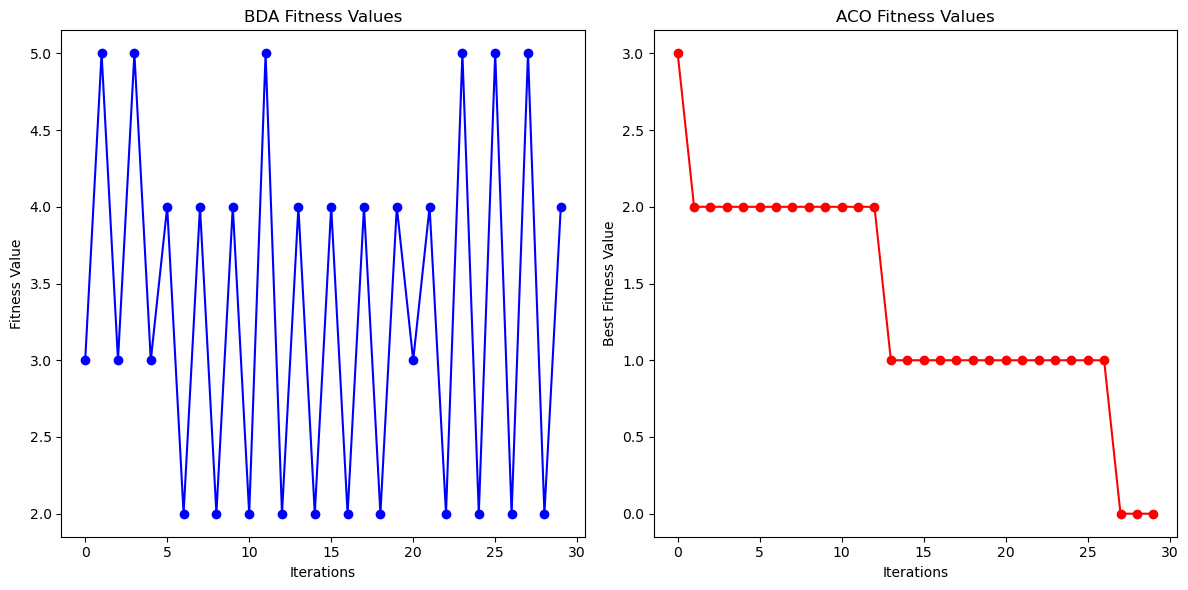

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Define your fitness function
def fitness_function(solution):
    return np.sum(solution)  # For maximization problem

# Binary Dragonfly Algorithm (BDA) with iteration tracking
def binary_dragon_fly_update(T, t, Time_t, Tmax, Tmin, Xi, delta_Xi, n, Floc, ΔXi, n_iterations):
    fitness_values = []

    for iteration in range(n_iterations):
        s, w, a, c, f, e = update_coefficients(iteration, T)
        
        for i in range(n):
            Si = np.zeros_like(Xi[i], dtype=float)
            Ai = np.zeros_like(Xi[i], dtype=float)
            Ci = np.zeros_like(Xi[i], dtype=float)
            Vj = np.random.rand(m)
            xj = np.random.rand(m)

            Fi = Floc - Xi[i]
            Ei = Eloc - Xi[i]

            for j in range(n):
                if j != i:
                    Si += Xi[j].astype(float) - Xi[i].astype(float)
                    Ai += Vj / n
                    Ci += (1 / n) * (xj - Xi[i].astype(float))

            deltaXi = (s * Si + a * Ai + c * Ci + f * Fi.astype(float) + e * Ei.astype(float)) + w * Xi[i].astype(float)

            t_s1 = T_S1(deltaXi, Time_t)
            v_s1 = V_S1(deltaXi, Time_t)

            Xi[i] = np.where(np.random.rand(m) < t_s1, 1, 0)
        
        # Record fitness value
        fitness_values.append(np.min([fitness_function(sol) for sol in Xi]))

    return Xi, fitness_values

# Update coefficients based on iteration
def update_coefficients(t, T):
    # Example function to update coefficients
    s = 0.2 + 0.8 * (t / T)
    w = 0.5
    a = 0.1
    c = 1.5
    f = 0.5
    e = 0.5
    return s, w, a, c, f, e


def aco_optimization(n_ants, n_iterations, n_dim, fitness_function, alpha=1, beta=2, rho=0.5, q=10):
    pheromone = np.ones((n_dim, n_dim))
    best_path_pheromone = np.zeros((n_dim, n_dim))
    best_fitness = np.inf
    fitness_values = []

    for _ in range(n_iterations):
        solutions = np.random.randint(2, size=(n_ants, n_dim))
        fitness_values_iter = np.array([fitness_function(sol) for sol in solutions])
        best_idx = np.argmin(fitness_values_iter)
        if fitness_values_iter[best_idx] < best_fitness:
            best_fitness = fitness_values_iter[best_idx]
        
        fitness_values.append(best_fitness)
        
        best_path_pheromone = np.zeros_like(pheromone)
        pheromone = (1 - rho) * pheromone + q * best_path_pheromone

    return best_fitness, fitness_values

# Initialize data
n = 5  # number of solutions
m = 10  # number of dimensions
Xi = np.random.randint(2, size=(n, m))  # random binary values
Floc = np.random.randint(2, size=m)  # random binary values for food location
Eloc = np.random.randint(2, size=m)  # random binary values for enemy location
ΔXi = np.zeros((n, m)) 

# Run BDA for 20 iterations
n_iterations = 30
Xi_bda, fitness_values_bda = binary_dragon_fly_update(T, t, Time_t, Tmax, Tmin, Xi, ΔXi, n, Floc, ΔXi, n_iterations)

# Run ACO for 20 iterations
n_ants = 10
best_fitness_aco, fitness_values_aco = aco_optimization(n_ants, n_iterations, m, fitness_function)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(n_iterations), fitness_values_bda, marker='o', linestyle='-', color='b')
plt.title('BDA Fitness Values')
plt.xlabel('Iterations')
plt.ylabel('Fitness Value')

plt.subplot(1, 2, 2)
plt.plot(range(n_iterations), fitness_values_aco, marker='o', linestyle='-', color='r')
plt.title('ACO Fitness Values')
plt.xlabel('Iterations')
plt.ylabel('Best Fitness Value')

plt.tight_layout()
plt.show()


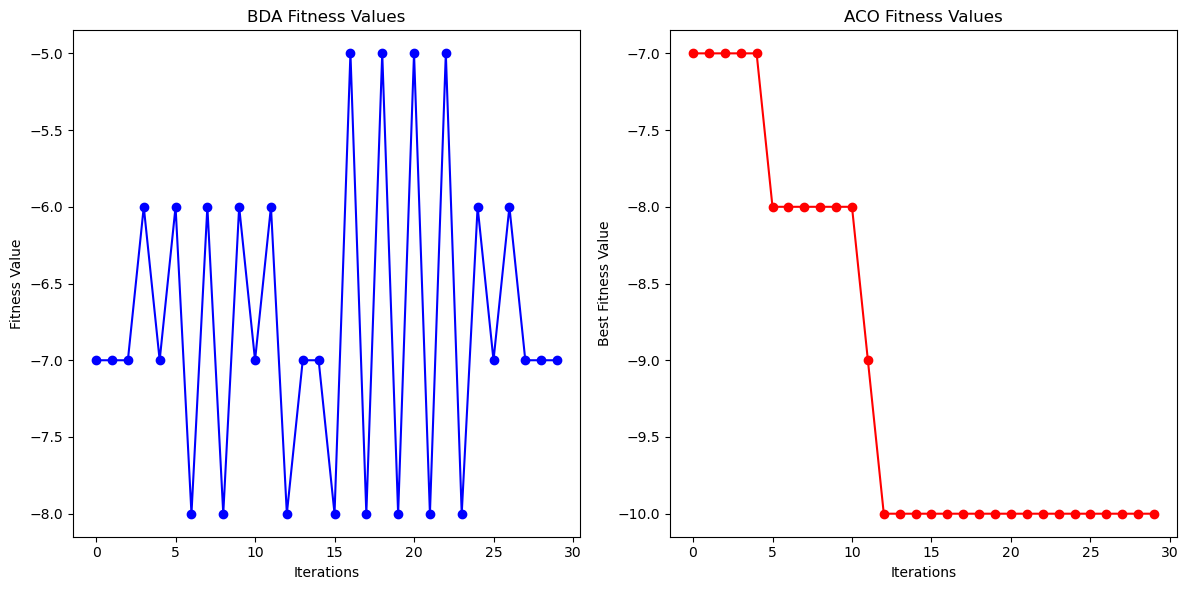

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Define your fitness function
def fitness_function(solution):
    return -np.sum(solution) #For minimisation problem

# Binary Dragonfly Algorithm (BDA) with iteration tracking
def binary_dragon_fly_update(T, t, Time_t, Tmax, Tmin, Xi, delta_Xi, n, Floc, ΔXi, n_iterations):
    fitness_values = []

    for iteration in range(n_iterations):
        s, w, a, c, f, e = update_coefficients(iteration, T)
        
        for i in range(n):
            Si = np.zeros_like(Xi[i], dtype=float)
            Ai = np.zeros_like(Xi[i], dtype=float)
            Ci = np.zeros_like(Xi[i], dtype=float)
            Vj = np.random.rand(m)
            xj = np.random.rand(m)

            Fi = Floc - Xi[i]
            Ei = Eloc - Xi[i]

            for j in range(n):
                if j != i:
                    Si += Xi[j].astype(float) - Xi[i].astype(float)
                    Ai += Vj / n
                    Ci += (1 / n) * (xj - Xi[i].astype(float))

            deltaXi = (s * Si + a * Ai + c * Ci + f * Fi.astype(float) + e * Ei.astype(float)) + w * Xi[i].astype(float)

            t_s1 = T_S1(deltaXi, Time_t)
            v_s1 = V_S1(deltaXi, Time_t)

            Xi[i] = np.where(np.random.rand(m) < t_s1, 1, 0)
        
        # Record fitness value
        fitness_values.append(np.min([fitness_function(sol) for sol in Xi]))

    return Xi, fitness_values

# Update coefficients based on iteration
def update_coefficients(t, T):
    # Example function to update coefficients
    s = 0.2 + 0.8 * (t / T)
    w = 0.5
    a = 0.1
    c = 1.5
    f = 0.5
    e = 0.5
    return s, w, a, c, f, e


def aco_optimization(n_ants, n_iterations, n_dim, fitness_function, alpha=1, beta=2, rho=0.5, q=10):
    pheromone = np.ones((n_dim, n_dim))
    best_path_pheromone = np.zeros((n_dim, n_dim))
    best_fitness = np.inf
    fitness_values = []

    for _ in range(n_iterations):
        solutions = np.random.randint(2, size=(n_ants, n_dim))
        fitness_values_iter = np.array([fitness_function(sol) for sol in solutions])
        best_idx = np.argmin(fitness_values_iter)
        if fitness_values_iter[best_idx] < best_fitness:
            best_fitness = fitness_values_iter[best_idx]
        
        fitness_values.append(best_fitness)
        
        best_path_pheromone = np.zeros_like(pheromone)
        pheromone = (1 - rho) * pheromone + q * best_path_pheromone

    return best_fitness, fitness_values

# Initialize data
n = 5  # number of solutions
m = 10  # number of dimensions
Xi = np.random.randint(2, size=(n, m))  # random binary values
Floc = np.random.randint(2, size=m)  # random binary values for food location
Eloc = np.random.randint(2, size=m)  # random binary values for enemy location
ΔXi = np.zeros((n, m)) 

# Run BDA for 20 iterations
n_iterations = 30
Xi_bda, fitness_values_bda = binary_dragon_fly_update(T, t, Time_t, Tmax, Tmin, Xi, ΔXi, n, Floc, ΔXi, n_iterations)

# Run ACO for 20 iterations
n_ants = 10
best_fitness_aco, fitness_values_aco = aco_optimization(n_ants, n_iterations, m, fitness_function)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(n_iterations), fitness_values_bda, marker='o', linestyle='-', color='b')
plt.title('BDA Fitness Values')
plt.xlabel('Iterations')
plt.ylabel('Fitness Value')

plt.subplot(1, 2, 2)
plt.plot(range(n_iterations), fitness_values_aco, marker='o', linestyle='-', color='r')
plt.title('ACO Fitness Values')
plt.xlabel('Iterations')
plt.ylabel('Best Fitness Value')

plt.tight_layout()
plt.show()
